# General code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# For machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

# For Performance Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, auc, RocCurveDisplay, ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions

# Cristian's code

# Arthur's code

In [ ]:
# Preprocessing
dataset2 = pd.read_csv("ObesityDataSet.csv").dropna()


# MinMax normzation is used due to the varying ranges of values of each dataset value
scaler = MinMaxScaler()
dataset2[['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'FCVC','TUE']] = scaler.fit_transform(dataset2[['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'FCVC','TUE']])

# Label Encoder is used for the binary values to convert then into zero and ones
encoder = LabelEncoder()
dataset2['family_history_with_overweight'] = encoder.fit_transform(dataset2['family_history_with_overweight'])
dataset2['FAVC'] = encoder.fit_transform(dataset2['FAVC'])
dataset2['SMOKE'] = encoder.fit_transform(dataset2['SMOKE'])
dataset2['SCC'] = encoder.fit_transform(dataset2['SCC'])
dataset2['Gender'] = encoder.fit_transform(dataset2['Gender'])

# Label encoding is also used CAEC/CALC/Nobeyesdad since they have a natural order
dataset2['CAEC'] = encoder.fit_transform(dataset2['CAEC'])
dataset2['CALC'] = encoder.fit_transform(dataset2['CALC'])
dataset2['NObeyesdad'] = encoder.fit_transform(dataset2['NObeyesdad'])

# One-shot encoding is used for MTRANS since the data does not have a natural order
# IMPORTANT NOTE: once this cell has been run MTRANS will be changed into MTRANS_Bike	MTRANS_Motorbike	MTRANS_Public_Transportation	MTRANS_Walking
# 'BIKE' will be infered by the AI training models if all of MTRANS values are zero
dataset2 = pd.get_dummies(dataset2, columns=['MTRANS'], drop_first=True)

dataset2.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,0.148936,0.320755,0.186567,1,0,0.5,0.666667,2,0,0.5,0,0.000000,0.5,3,1,False,False,True,False
1,0,0.148936,0.132075,0.126866,1,0,1.0,0.666667,2,1,1.0,1,1.000000,0.0,2,1,False,False,True,False
2,1,0.191489,0.660377,0.283582,1,0,0.5,0.666667,2,0,0.5,0,0.666667,0.5,1,1,False,False,True,False
3,1,0.276596,0.660377,0.358209,0,0,1.0,0.666667,2,0,0.5,0,0.666667,0.0,1,5,False,False,False,True
4,1,0.170213,0.622642,0.379104,0,0,0.5,0.000000,2,0,0.5,0,0.000000,0.0,2,6,False,False,True,False


In [ ]:
# Using Train-testing-vaildation split 80%-10%-10%
X = dataset2.drop(columns=['NObeyesdad'])
y = dataset2[['NObeyesdad']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1/(1-0.1), random_state=42)

print('Instances in training:', len(X_train)) # 80% of instannces training
print('Instances in validation:', len(X_val)) # 10% of instannces validation
print('Instances in testing:', len(X_test))   # 10% of instannces testing


Instances in training: 1687
Instances in validation: 212
Instances in testing: 212


In [ ]:
# Logistic Regression default
logisticModel = LogisticRegression(max_iter=10000)

logisticModel.fit(X_train, np.ravel(y_train))


print("Default logistic Regression acuracy:")
print("Training set:", logisticModel.score(X_train, np.ravel(y_train)) * 100)
print("Testing set:", logisticModel.score(X_test, np.ravel(y_test)) * 100)
print("Validation set:", logisticModel.score(X_val, np.ravel(y_val)) * 100)


# Logistic Regression tunning using GridSearch()

LRT = {
    'C': [0.01, 0.1, 1, 10],                 # Regularization strength
    'penalty': ['l1', 'l2','elasticnet','none'],  # Type of regularization
    'solver': ['liblinear', 'saga', 'lbfgs'],     # Optimization algorithm
}

# Some fits will fail since some of the penalty and solver combinations cannot run together
# this will result in a fit failed warning, just disregraud these warnings as their values
# will be set to nan and not be selected

import warnings
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)


grid_search = GridSearchCV(logisticModel, LRT, cv=5, scoring='accuracy')

grid_search.fit(X_train, np.ravel(y_train))

print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_ * 100)

logisticModelTuned = grid_search.best_estimator_

print("\nDefault logistic Regression acuracy:")
print("Training set:", logisticModelTuned.score(X_train, np.ravel(y_train)) * 100)
print("Testing set:", logisticModelTuned.score(X_test, np.ravel(y_test)) * 100)
print("Validation set:", logisticModelTuned.score(X_val, np.ravel(y_val)) * 100)

warnings.resetwarnings() # reset warning settings to default

Default logistic Regression acuracy:
Training set: 74.51096621221103
Testing set: 72.16981132075472
Validation set: 72.64150943396226

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 94.96110828226783

Default logistic Regression acuracy:
Training set: 96.5026674570243
Testing set: 92.45283018867924
Validation set: 95.75471698113208


Preformance report Logistic Regression Default
Accuracy: 72.16981132075472


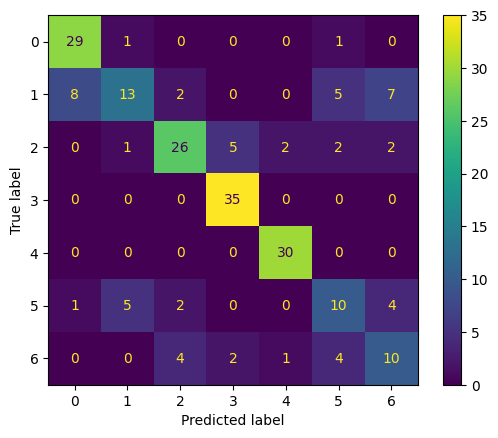


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84        31
           1       0.65      0.37      0.47        35
           2       0.76      0.68      0.72        38
           3       0.83      1.00      0.91        35
           4       0.91      1.00      0.95        30
           5       0.45      0.45      0.45        22
           6       0.43      0.48      0.45        21

    accuracy                           0.72       212
   macro avg       0.69      0.70      0.69       212
weighted avg       0.71      0.72      0.71       212

Preformance report Logistic Regression Tuned


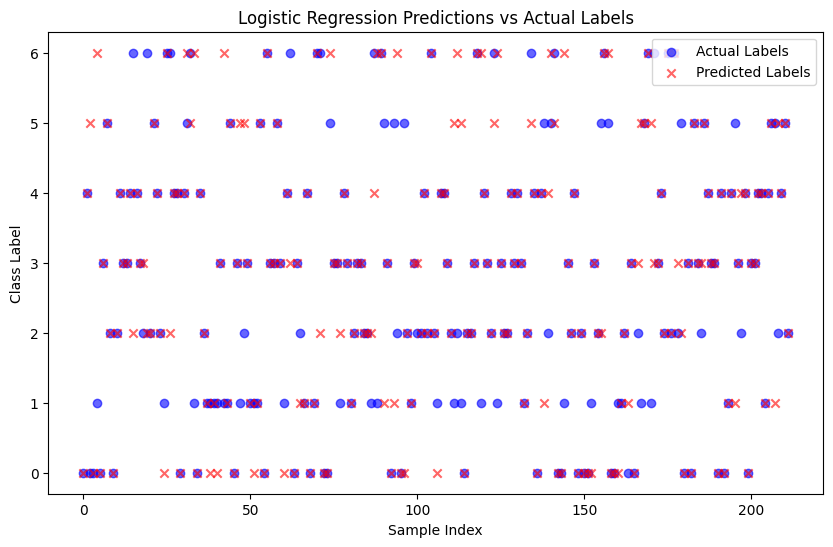

Accuracy: 92.45283018867924


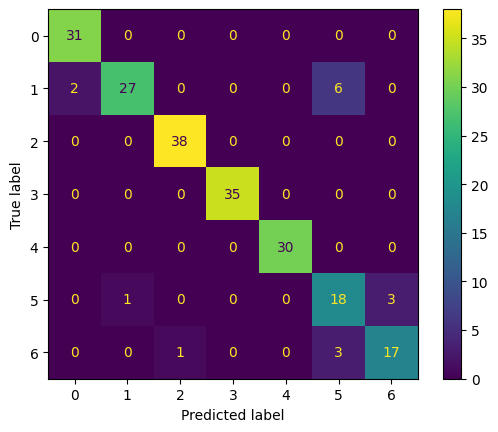


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       0.96      0.77      0.86        35
           2       0.97      1.00      0.99        38
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        30
           5       0.67      0.82      0.73        22
           6       0.85      0.81      0.83        21

    accuracy                           0.92       212
   macro avg       0.91      0.91      0.91       212
weighted avg       0.93      0.92      0.93       212



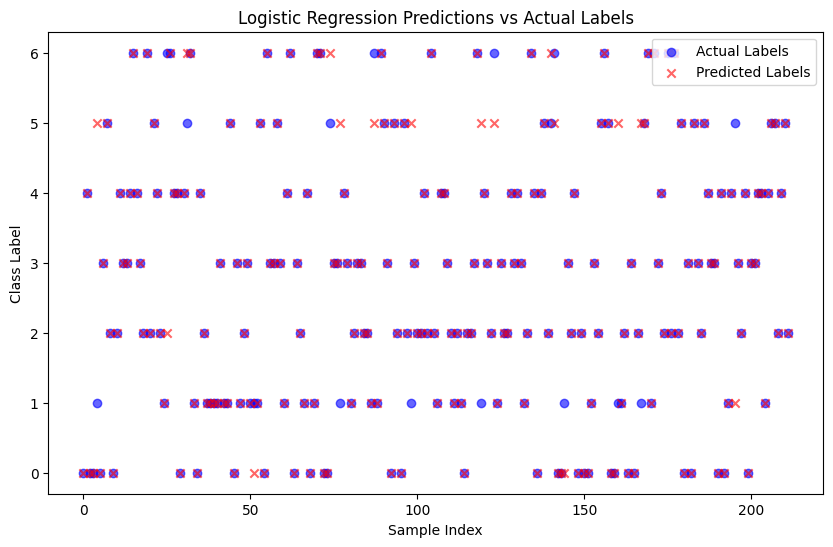

In [ ]:
# Preforamance report logistic Regression default
print("Preformance report Logistic Regression Default")

# Accuracy report
y_pred = logisticModel.predict(X_test)
acuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", acuracy * 100)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logisticModel, X_test, y_test)
plt.show()

# Precision, Recall, F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Preforamance report logistic Regression tuned
print("Preformance report Logistic Regression Tuned")

# Prediction Scatter Plot
plt.figure(figsize=(10, 6))

plt.scatter(range(len(np.ravel(y_test))), np.ravel(y_test), color='blue', marker='o', label="Actual Labels", alpha=0.6)
plt.scatter(range(len(np.ravel(y_pred))), np.ravel(y_pred), color='red', marker='x', label="Predicted Labels", alpha=0.6)

plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Logistic Regression Predictions vs Actual Labels")
plt.legend()
plt.show()






# Accuracy report
y_pred = logisticModelTuned.predict(X_test)
acuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", acuracy * 100)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logisticModelTuned, X_test, y_test)
plt.show()

# Precision, Recall, F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Prediction Scatter Plot
plt.figure(figsize=(10, 6))

plt.scatter(range(len(np.ravel(y_test))), np.ravel(y_test), color='blue', marker='o', label="Actual Labels", alpha=0.6)
plt.scatter(range(len(np.ravel(y_pred))), np.ravel(y_pred), color='red', marker='x', label="Predicted Labels", alpha=0.6)

plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Logistic Regression Predictions vs Actual Labels")
plt.legend()
plt.show()



In [ ]:
# K-nearest neighbors default
knnModel = KNeighborsClassifier()

knnModel.fit(X_train, np.ravel(y_train))

print("Default knn model acuracy:")
print("Training set:", knnModel.score(X_train, np.ravel(y_train)) * 100)
print("Testing set:", knnModel.score(X_test, np.ravel(y_test)) * 100)
print("Validation set:", knnModel.score(X_val, np.ravel(y_val)) * 100)

# K-nearest neighbors Grid Search tuning
k = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # Manhattan vs. Euclidean
}

grid_search = GridSearchCV(knnModel, k, cv=5, scoring='accuracy')

grid_search.fit(X_train, np.ravel(y_train))

print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_ * 100)

knnModelTuned = grid_search.best_estimator_

print("\nKnn model Tuned acuracy:")
print("Training set:", knnModelTuned.score(X_train, np.ravel(y_train)) * 100)
print("Testing set:", knnModelTuned.score(X_test, np.ravel(y_test)) * 100)
print("Validation set:", knnModelTuned.score(X_val, np.ravel(y_val)) * 100)


Default knn model acuracy:
Training set: 83.99525785417902
Testing set: 79.24528301886792
Validation set: 79.24528301886792

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Accuracy: 83.69919056063772

Knn model Tuned acuracy:
Training set: 100.0
Testing set: 86.32075471698113
Validation set: 85.37735849056604


Preformance report KNN Default
Accuracy: 79.24528301886792


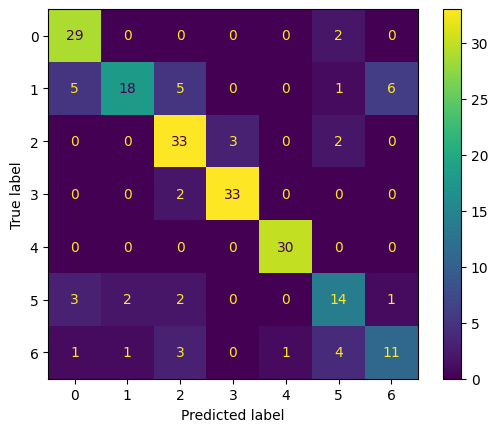


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84        31
           1       0.86      0.51      0.64        35
           2       0.73      0.87      0.80        38
           3       0.92      0.94      0.93        35
           4       0.97      1.00      0.98        30
           5       0.61      0.64      0.62        22
           6       0.61      0.52      0.56        21

    accuracy                           0.79       212
   macro avg       0.78      0.77      0.77       212
weighted avg       0.80      0.79      0.78       212



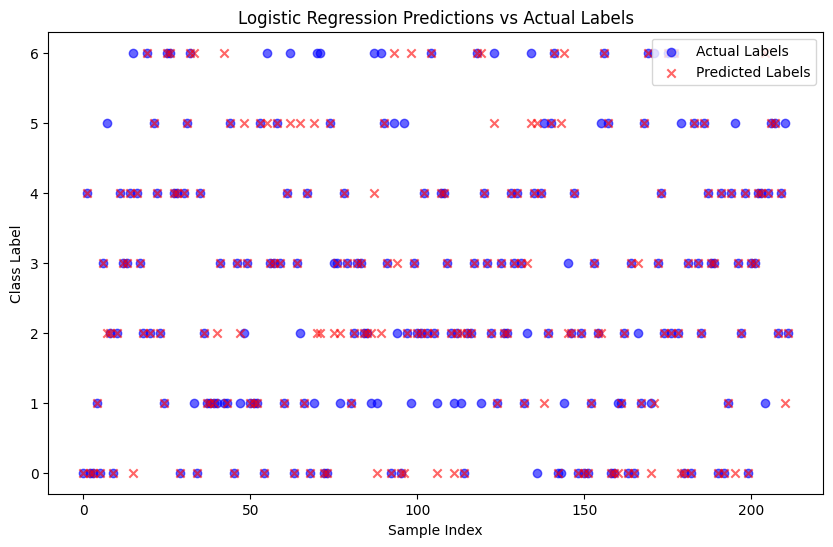

Preformance report KNN Tuned
Accuracy: 86.32075471698113


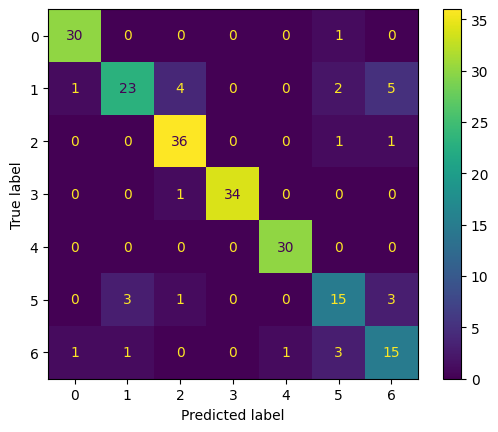


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.85      0.66      0.74        35
           2       0.86      0.95      0.90        38
           3       1.00      0.97      0.99        35
           4       0.97      1.00      0.98        30
           5       0.68      0.68      0.68        22
           6       0.62      0.71      0.67        21

    accuracy                           0.86       212
   macro avg       0.85      0.85      0.84       212
weighted avg       0.87      0.86      0.86       212



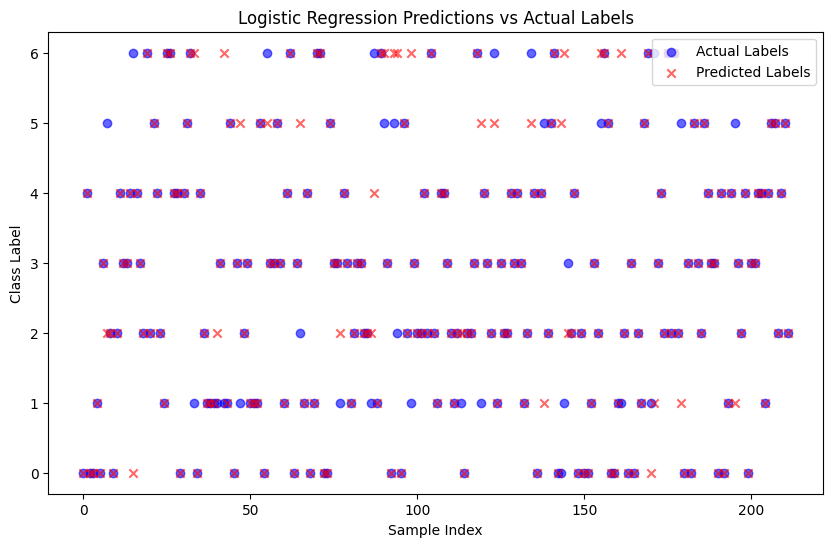

In [ ]:
# Preforamance report Knn default
print("Preformance report KNN Default")

# Accuracy report
y_pred = knnModel.predict(X_test)
acuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", acuracy * 100)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knnModel, X_test, y_test)
plt.show()

# Precision, Recall, F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Prediction Scatter Plot
plt.figure(figsize=(10, 6))

plt.scatter(range(len(np.ravel(y_test))), np.ravel(y_test), color='blue', marker='o', label="Actual Labels", alpha=0.6)
plt.scatter(range(len(np.ravel(y_pred))), np.ravel(y_pred), color='red', marker='x', label="Predicted Labels", alpha=0.6)

plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Logistic Regression Predictions vs Actual Labels")
plt.legend()
plt.show()

# Preforamance report Knn Tuned
print("Preformance report KNN Tuned")
# Accuracy report
y_pred = knnModelTuned.predict(X_test)
acuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", acuracy * 100)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knnModelTuned, X_test, y_test)
plt.show()

# Precision, Recall, F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Prediction Scatter Plot
plt.figure(figsize=(10, 6))

plt.scatter(range(len(np.ravel(y_test))), np.ravel(y_test), color='blue', marker='o', label="Actual Labels", alpha=0.6)
plt.scatter(range(len(np.ravel(y_pred))), np.ravel(y_pred), color='red', marker='x', label="Predicted Labels", alpha=0.6)

plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Logistic Regression Predictions vs Actual Labels")
plt.legend()
plt.show()

In [ ]:
# Muliti-Layer Perception

# Muli-Layer Perception Default
mlpModel = MLPClassifier(max_iter=10000)
mlpModel.fit(X_train, np.ravel(y_train))

print("Default MLP Model acuracy:")
print("Train Set Accuracy:", mlpModel.score(X_train, np.ravel(y_train)) * 100)
print("Test Set Accuracy:",  mlpModel.score(X_test, np.ravel(y_test)) * 100)
print("Validation Set Accuracy:", mlpModel.score(X_val, np.ravel(y_val)) * 100)

# Multi-Layer Perception Grid Search for best hyperparameters

per = {
    'hidden_layer_sizes': [(10, 10, 10), (20,20)],
    'activation': ['identity', 'logistic', 'tanh', 'relu']
}

grid_search = GridSearchCV(MLPClassifier(max_iter=10000), per, cv=5, scoring='accuracy')
grid_search.fit(X_train, np.ravel(y_train))

print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_ * 100)

mlpModelTuned = grid_search.best_estimator_

print("\nMLP Model Tuned acuracy:")
print("Train Set Accuracy:", mlpModelTuned.score(X_train, np.ravel(y_train)) * 100)
print("Test Set Accuracy:", mlpModelTuned.score(X_test, np.ravel(y_test)) * 100)
print("Validation Set Accuracy:", mlpModelTuned.score(X_val, np.ravel(y_val)) * 100)


Default MLP Model acuracy:
Train Set Accuracy: 99.9407231772377
Test Set Accuracy: 93.39622641509435
Validation Set Accuracy: 94.33962264150944

Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (20, 20)}
Best Accuracy: 96.38421154285112

MLP Model Tuned acuracy:
Train Set Accuracy: 99.8221695317131
Test Set Accuracy: 97.16981132075472
Validation Set Accuracy: 94.33962264150944


Performance Report for MLP Classifier Default
Accuracy: 93.39622641509435


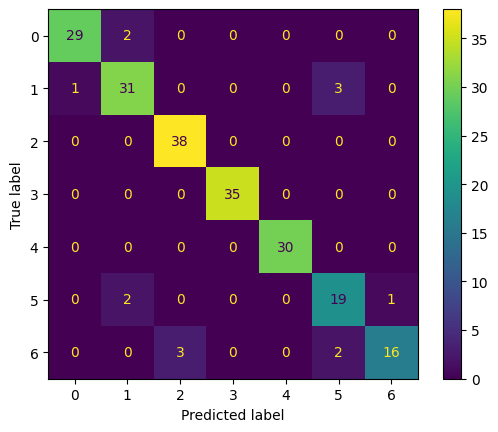


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.89      0.89      0.89        35
           2       0.93      1.00      0.96        38
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        30
           5       0.79      0.86      0.83        22
           6       0.94      0.76      0.84        21

    accuracy                           0.93       212
   macro avg       0.93      0.92      0.92       212
weighted avg       0.94      0.93      0.93       212

Performance Report for MLP Classifier Tuned
Accuracy: 97.16981132075472


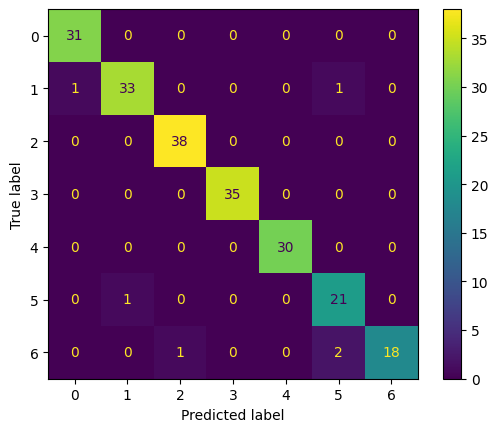


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.97      0.94      0.96        35
           2       0.97      1.00      0.99        38
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        30
           5       0.88      0.95      0.91        22
           6       1.00      0.86      0.92        21

    accuracy                           0.97       212
   macro avg       0.97      0.96      0.97       212
weighted avg       0.97      0.97      0.97       212



In [ ]:
# Preforamance report MLP Classifier default
print("Performance Report for MLP Classifier Default")

# Accuracy report
y_pred = mlpModel.predict(X_test)
acuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", acuracy * 100)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(mlpModel, X_test, y_test)
plt.show()

# Precision, Recall, F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Preforamance report MLP Classifier tuned
print("Performance Report for MLP Classifier Tuned")

# Prediction Scatter Plot
plt.figure(figsize=(10, 6))

plt.scatter(range(len(np.ravel(y_test))), np.ravel(y_test), color='blue', marker='o', label="Actual Labels", alpha=0.6)
plt.scatter(range(len(np.ravel(y_pred))), np.ravel(y_pred), color='red', marker='x', label="Predicted Labels", alpha=0.6)

plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Logistic Regression Predictions vs Actual Labels")
plt.legend()
plt.show()


# Accuracy report
y_pred = mlpModelTuned.predict(X_test)
acuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", acuracy * 100)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(mlpModelTuned, X_test, y_test)
plt.show()

# Precision, Recall, F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Prediction Scatter Plot
plt.figure(figsize=(10, 6))

plt.scatter(range(len(np.ravel(y_test))), np.ravel(y_test), color='blue', marker='o', label="Actual Labels", alpha=0.6)
plt.scatter(range(len(np.ravel(y_pred))), np.ravel(y_pred), color='red', marker='x', label="Predicted Labels", alpha=0.6)

plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Logistic Regression Predictions vs Actual Labels")
plt.legend()
plt.show()